# tSNE

### Installs

In [ ]:
#pip install plotly.express 

In [3]:
#pip install --upgrade nbformat

In [4]:
#pip install ipykernel

In [5]:
#pip install --upgrade pip

### Imports

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px
import seaborn as sns
#import re

## Data Load and Preprocessing

#### Clinical dataset

In [7]:
data_clinical = pd.read_csv("C:\\Users\\USER~\\OneDrive - FCT NOVA\\PBCM\\Data_TGCA\\BRCA_clinicalData.txt", sep="\t")
#data_clinical = pd.read_csv("C:\\Users\\arati\\OneDrive - FCT NOVA\\PBCM\\Data_TGCA\\BRCA_clinicalData.txt", sep="\t")

data_clinical.head(3)

,sampleId,patientId,studyId,CANCER_TYPE,CANCER_TYPE_DETAILED,CN_CLUSTER,CONVERTED_STAGE,ER_STATUS,FRACTION_GENOME_ALTERED,HER2_STATUS,...,SURVIVAL_DATA_FORM,TMB_NONSYNONYMOUS,TUMOR_STAGE,TUMOR_T1_CODED,AGE,METASTASIS,OS_MONTHS,OS_STATUS,SAMPLE_COUNT,SEX
0,TCGA-A2-A0T2-01,TCGA-A2-A0T2,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,3,No_Conversion,Negative,0.9463,Negative,...,followup,0.766667,T3,T_Other,66,M1,7.89,1:DECEASED,1,Female
1,TCGA-A2-A04P-01,TCGA-A2-A04P,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,1,No_Conversion,Negative,0.6407,Negative,...,followup,3.400000,T2,T_Other,36,M0,17.97,1:DECEASED,1,Female
2,TCGA-A1-A0SK-01,TCGA-A1-A0SK,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,1,Stage IIA,Negative,0.4163,Negative,...,followup,1.600000,T2,T_Other,54,M0,31.77,1:DECEASED,1,Female


In [8]:
#data_clinical['sampleId'] = data_clinical['sampleId'].map(lambda i : re.sub('-', '.', i))
#data_clinical.head(3)

In [9]:
mask_normal_like_exclusion = data_clinical["PAM50_SUBTYPE"]  != "Normal-like"

In [10]:
data_clinical = data_clinical.loc[mask_normal_like_exclusion]
data_clinical.head(3)

,sampleId,patientId,studyId,CANCER_TYPE,CANCER_TYPE_DETAILED,CN_CLUSTER,CONVERTED_STAGE,ER_STATUS,FRACTION_GENOME_ALTERED,HER2_STATUS,...,SURVIVAL_DATA_FORM,TMB_NONSYNONYMOUS,TUMOR_STAGE,TUMOR_T1_CODED,AGE,METASTASIS,OS_MONTHS,OS_STATUS,SAMPLE_COUNT,SEX
0,TCGA-A2-A0T2-01,TCGA-A2-A0T2,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,3,No_Conversion,Negative,0.9463,Negative,...,followup,0.766667,T3,T_Other,66,M1,7.89,1:DECEASED,1,Female
1,TCGA-A2-A04P-01,TCGA-A2-A04P,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,1,No_Conversion,Negative,0.6407,Negative,...,followup,3.400000,T2,T_Other,36,M0,17.97,1:DECEASED,1,Female
2,TCGA-A1-A0SK-01,TCGA-A1-A0SK,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,1,Stage IIA,Negative,0.4163,Negative,...,followup,1.600000,T2,T_Other,54,M0,31.77,1:DECEASED,1,Female


In [11]:
data_clinical.shape

(455, 37)

In [12]:
samplesId = data_clinical["sampleId"]
samples = []
for i in samplesId:
    samples.append(i)
samples

['TCGA-A2-A0T2-01',
 'TCGA-A2-A04P-01',
 'TCGA-A1-A0SK-01',
 'TCGA-A2-A0CM-01',
 'TCGA-AR-A1AR-01',
 'TCGA-B6-A0WX-01',
 'TCGA-BH-A1F0-01',
 'TCGA-BH-A18V-01',
 'TCGA-BH-A18Q-01',
 'TCGA-BH-A18K-01',
 'TCGA-BH-A0E0-01',
 'TCGA-BH-A0RX-01',
 'TCGA-A7-A13D-01',
 'TCGA-BH-A0E6-01',
 'TCGA-AO-A0J4-01',
 'TCGA-A7-A0CE-01',
 'TCGA-A7-A0DA-01',
 'TCGA-D8-A142-01',
 'TCGA-AQ-A04J-01',
 'TCGA-A2-A0T0-01',
 'TCGA-A2-A0D0-01',
 'TCGA-AO-A0J6-01',
 'TCGA-A2-A0YM-01',
 'TCGA-A2-A0D2-01',
 'TCGA-BH-A0B3-01',
 'TCGA-A2-A04Q-01',
 'TCGA-A2-A0SX-01',
 'TCGA-AO-A0JL-01',
 'TCGA-AO-A12F-01',
 'TCGA-BH-A0B9-01',
 'TCGA-B6-A0RT-01',
 'TCGA-AO-A129-01',
 'TCGA-AO-A124-01',
 'TCGA-B6-A0RU-01',
 'TCGA-B6-A0IQ-01',
 'TCGA-B6-A0I2-01',
 'TCGA-B6-A0IJ-01',
 'TCGA-B6-A0RE-01',
 'TCGA-A2-A0ST-01',
 'TCGA-AR-A0TP-01',
 'TCGA-A1-A0SO-01',
 'TCGA-A8-A07C-01',
 'TCGA-A8-A07O-01',
 'TCGA-A8-A07R-01',
 'TCGA-A8-A07U-01',
 'TCGA-A8-A08H-01',
 'TCGA-A8-A08R-01',
 'TCGA-AN-A04D-01',
 'TCGA-AN-A0AL-01',
 'TCGA-AN-A0AR-01',


#### miRNA Dataset

In [13]:
data_miRNA = pd.read_csv('C:\\Users\\USER~\\OneDrive - FCT NOVA\\PBCM\\Data_TGCA\\BRCA_microRNA_expression.txt', sep = '\t')
#data_miRNA = pd.read_csv('C:\\Users\\arati\\OneDrive - FCT NOVA\\PBCM\\Data_TGCA\\BRCA_microRNA_expression.txt', sep = '\t')
data_miRNA.head(3)

,entrezGeneId,hugoGeneSymbol,type,TCGA-A1-A0SE-01,TCGA-A1-A0SH-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SO-01,TCGA-A2-A04P-01,...,TCGA-BH-A0HO-01,TCGA-BH-A0HP-01,TCGA-BH-A0HU-01,TCGA-BH-A0HW-01,TCGA-BH-A0HX-01,TCGA-BH-A0RX-01,TCGA-BH-A0W3-01,TCGA-BH-A0W4-01,TCGA-BH-A0W5-01,TCGA-BH-A0WA-01
0,-164,MIR-744/744*,miRNA,3.675192,3.033211,1.678295,3.576166,3.332498,5.097113,2.995839,...,4.297283,1.834118,3.788151,3.769429,2.577506,4.082119,5.226695,3.534248,3.028002,2.915743
1,-163,MIR-744/744,miRNA,3.675192,3.033211,1.678295,3.576166,3.332498,5.097113,2.995839,...,4.297283,1.834118,3.788151,3.769429,2.577506,4.082119,5.226695,3.534248,3.028002,2.915743
2,-162,MIR-744/3P,miRNA,3.675192,3.033211,1.678295,3.576166,3.332498,5.097113,2.995839,...,4.297283,1.834118,3.788151,3.769429,2.577506,4.082119,5.226695,3.534248,3.028002,2.915743


In [14]:
data_miRNA = data_miRNA.set_index(data_miRNA['hugoGeneSymbol'])
data_miRNA = data_miRNA.drop(columns = ['entrezGeneId', 'type','hugoGeneSymbol'],)
data_miRNA = data_miRNA.transpose()
data_miRNA.head(3)

hugoGeneSymbol,MIR-744/744*,MIR-744/744,MIR-744/3P,MIR-744/5P,MIR-758/758,MIR-758/3P,MIR-758/5P,MIR-766/766,MIR-766/3P,MIR-766/5P,...,MIR-1-1/1,MIR-1-2/1,MIR-100/100*,MIR-100/100,MIR-100/3P,MIR-100/5P,MIR-100-11/100,MIR-101/101,MIR-101/3P,MIR-101/5P
TCGA-A1-A0SE-01,3.675192,3.675192,3.675192,3.675192,2.090229,2.090229,2.090229,1.711718,1.711718,1.711718,...,2.913351,2.913351,11.658770,11.658770,11.658770,11.658770,11.658770,13.506458,13.506458,13.506458
TCGA-A1-A0SH-01,3.033211,3.033211,3.033211,3.033211,3.420234,3.420234,3.420234,2.332771,2.332771,2.332771,...,2.502696,2.502696,12.044008,12.044008,12.044008,12.044008,12.044008,11.241914,11.241914,11.241914
TCGA-A1-A0SJ-01,1.678295,1.678295,1.678295,1.678295,1.815799,1.815799,1.815799,1.678295,1.678295,1.678295,...,4.864162,4.864162,11.193798,11.193798,11.193798,11.193798,11.193798,12.224708,12.224708,12.224708


In [15]:
data_miRNA.shape

(272, 888)

In [16]:
data_miRNA= data_miRNA[data_miRNA.index.isin(samples)]
data_miRNA.shape

(267, 888)

#### mRNA Dataset

In [17]:
data_mRNA = pd.read_csv('C:\\Users\\USER~\\OneDrive - FCT NOVA\\PBCM\\Data_TGCA\\BRCA_mRNAs_expression.txt', sep = '\t')
#data_mRNA = pd.read_csv('C:\\Users\\arati\\OneDrive - FCT NOVA\\PBCM\\Data_TGCA\\BRCA_mRNAs_expression.txt', sep = '\t')
data_mRNA.head(3)

,entrezGeneId,hugoGeneSymbol,type,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SH-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SO-01,...,TCGA-E2-A15O-01,TCGA-E2-A15P-01,TCGA-E2-A15R-01,TCGA-E2-A1B0-01,TCGA-E2-A1B1-01,TCGA-E2-A1B4-01,TCGA-E2-A1B5-01,TCGA-E2-A1B6-01,TCGA-E2-A1BC-01,TCGA-E2-A1BD-01
0,-2948,MIR-16/3P,miRNA,0.4535,1.06175,0.373875,0.51575,-0.177375,0.671875,0.777875,...,1.402125,0.61125,0.839625,0.4855,0.406125,0.686375,-0.019875,0.640375,1.06225,1.180875
1,-2946,MIR-16/16,miRNA,0.4535,1.06175,0.373875,0.51575,-0.177375,0.671875,0.777875,...,1.402125,0.61125,0.839625,0.4855,0.406125,0.686375,-0.019875,0.640375,1.06225,1.180875
2,-2945,MIR-16/5P,miRNA,0.4535,1.06175,0.373875,0.51575,-0.177375,0.671875,0.777875,...,1.402125,0.61125,0.839625,0.4855,0.406125,0.686375,-0.019875,0.640375,1.06225,1.180875


In [18]:
data_mRNA = data_mRNA.set_index(data_mRNA['hugoGeneSymbol'])
data_mRNA = data_mRNA.drop(columns = ['entrezGeneId', 'type','hugoGeneSymbol'],)
data_mRNA = data_mRNA.transpose()
data_mRNA.head(3)

hugoGeneSymbol,MIR-16/3P,MIR-16/16,MIR-16/5P,MIR-16-1/16,MIR-16-13/16,MIR-16-2/16,GAS8-AS1,SLC22A18AS,PWAR5,INE1,...,C8ORF44,C3ORF36,TUBA3FP,C11ORF40,C15ORF32,C9ORF163,VN1R3,MSLNL,DNAJB3,C8ORF17
TCGA-A1-A0SD-01,0.453500,0.453500,0.453500,0.453500,0.453500,0.453500,0.275667,0.153833,-0.309,-1.249833,...,-0.34825,0.79350,-1.682167,0.494,0.5395,-0.308,-0.265667,0.34475,0.097750,-0.279250
TCGA-A1-A0SE-01,1.061750,1.061750,1.061750,1.061750,1.061750,1.061750,0.419833,-0.768833,-0.068,-1.311333,...,-0.40725,0.55775,-1.280500,-0.038,-0.0610,-0.416,0.014667,0.39225,0.159000,-0.108667
TCGA-A1-A0SH-01,0.373875,0.373875,0.373875,0.373875,0.373875,0.373875,0.430833,-0.585333,-0.398,-1.619667,...,-0.75175,0.58575,-0.895167,0.182,0.8815,-0.695,0.066333,0.46350,0.441625,0.082750


In [19]:
data_mRNA.shape

(460, 17195)

In [20]:
data_mRNA= data_mRNA[data_mRNA.index.isin(samples)]
data_mRNA.shape

(452, 17195)

In [ ]:
# Set a seed
set_seed = 2909

## Scale the data

In [22]:
# Standardize the data
scaler = StandardScaler()

In [ ]:
# Drop NA values
data_mRNA = data_mRNA.dropna(axis=1)
data_miRNA = data_miRNA.dropna(axis=1)

In [24]:
data_miRNA_scaled = scaler.fit_transform(data_miRNA)
data_mRNA_scaled = scaler.fit_transform(data_mRNA)

## PCA with 50 componentss 
(Acelerate the performance of tSNE)

In [25]:
# Do a PCA to pre-reduce the dimensionality of the data
pca = PCA(n_components=50)

#### miRNA

In [26]:
miRNA_samples = data_miRNA.index
data_clinical_miRNA = data_clinical[data_clinical['sampleId'].isin(miRNA_samples)]
data_clinical_miRNA.shape

(267, 37)

In [27]:
Y_miRNA = data_clinical_miRNA["PAM50_SUBTYPE"]

In [28]:
X_pca_miRNA = pca.fit_transform(data_miRNA_scaled)

#### mRNA

In [29]:
mRNA_samples = data_mRNA.index
data_clinical_mRNA = data_clinical[data_clinical['sampleId'].isin(mRNA_samples)]
data_clinical_mRNA.shape

(452, 37)

In [30]:
Y_mRNA = data_clinical_mRNA["PAM50_SUBTYPE"]

In [31]:
X_pca_mRNA = pca.fit_transform(data_mRNA_scaled)

## Hyperparameter perplexity 

In [32]:
perplexity = np.arange(5, 100, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_pca_miRNA)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values for miRNA dataset", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [33]:
perplexity = np.arange(5, 100, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_pca_mRNA)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values for mRNA dataset", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

## tSNE


#### miRNA

In [ ]:
tsne = TSNE(n_components=2, random_state = 40, perplexity=40, init = 'pca')
X_miRNA_tsne = tsne.fit_transform(X_pca_miRNA)
tsne.kl_divergence_ 

0.6782497763633728

In [35]:
mirna_tsne_df = pd.DataFrame(X_miRNA_tsne, index = data_miRNA.index, columns = ['Dim1', 'Dim2'])
mirna_tsne_df 

,Dim1,Dim2
TCGA-A1-A0SE-01,-3.190568,5.709601
TCGA-A1-A0SH-01,-3.643937,7.837124
TCGA-A1-A0SJ-01,1.378194,1.385609
TCGA-A1-A0SK-01,9.919408,-7.521049
TCGA-A1-A0SM-01,0.424209,6.078228
...,...,...
TCGA-BH-A0RX-01,6.034419,-4.416231
TCGA-BH-A0W3-01,-1.805528,-0.797696
TCGA-BH-A0W4-01,-5.365978,-0.477754
TCGA-BH-A0W5-01,-4.898571,-1.341638


In [ ]:
# Add the PAM50 subtype of the data
mirna_tsne_df.reset_index(names = 'sampleId', inplace = True)
mirna_tsne_df = pd.merge(mirna_tsne_df, data_clinical_miRNA[['sampleId', 'PAM50_SUBTYPE']],
                        how = 'left', on = 'sampleId')
mirna_tsne_df

,sampleId,Dim1,Dim2,PAM50_SUBTYPE
0,TCGA-A1-A0SE-01,-3.190568,5.709601,Luminal A
1,TCGA-A1-A0SH-01,-3.643937,7.837124,Luminal A
2,TCGA-A1-A0SJ-01,1.378194,1.385609,Luminal A
3,TCGA-A1-A0SK-01,9.919408,-7.521049,Basal-like
4,TCGA-A1-A0SM-01,0.424209,6.078228,Luminal B
...,...,...,...,...
262,TCGA-BH-A0RX-01,6.034419,-4.416231,Basal-like
263,TCGA-BH-A0W3-01,-1.805528,-0.797696,Luminal B
264,TCGA-BH-A0W4-01,-5.365978,-0.477754,Luminal A
265,TCGA-BH-A0W5-01,-4.898571,-1.341638,Luminal A


#### mRNA

In [37]:
tsne = TSNE(n_components=2, random_state = 40, perplexity=35, init = 'pca')
X_mRNA_tsne = tsne.fit_transform(X_pca_mRNA)
tsne.kl_divergence_

1.1785250902175903

In [38]:
mrna_tsne_df = pd.DataFrame(X_mRNA_tsne, index = data_mRNA.index, columns = ['Dim1', 'Dim2'])
mrna_tsne_df

,Dim1,Dim2
TCGA-A1-A0SD-01,-7.661946,-12.618414
TCGA-A1-A0SE-01,-0.097349,-7.721076
TCGA-A1-A0SH-01,0.545403,-1.451967
TCGA-A1-A0SJ-01,-6.349015,-0.835349
TCGA-A1-A0SK-01,12.830268,21.430889
...,...,...
TCGA-E2-A1B4-01,4.488083,-10.189421
TCGA-E2-A1B5-01,5.113874,15.504890
TCGA-E2-A1B6-01,-6.161445,11.264559
TCGA-E2-A1BC-01,2.191659,-14.706857


In [ ]:
# Add the PAM50 subtype of the data
mrna_tsne_df.reset_index(names = 'sampleId', inplace = True)
mrna_tsne_df = pd.merge(mrna_tsne_df, data_clinical_mRNA[['sampleId', 'PAM50_SUBTYPE']],
                        how = 'left', on = 'sampleId')
mrna_tsne_df

,sampleId,Dim1,Dim2,PAM50_SUBTYPE
0,TCGA-A1-A0SD-01,-7.661946,-12.618414,Luminal A
1,TCGA-A1-A0SE-01,-0.097349,-7.721076,Luminal A
2,TCGA-A1-A0SH-01,0.545403,-1.451967,Luminal A
3,TCGA-A1-A0SJ-01,-6.349015,-0.835349,Luminal A
4,TCGA-A1-A0SK-01,12.830268,21.430889,Basal-like
...,...,...,...,...
447,TCGA-E2-A1B4-01,4.488083,-10.189421,Luminal A
448,TCGA-E2-A1B5-01,5.113874,15.504890,Basal-like
449,TCGA-E2-A1B6-01,-6.161445,11.264559,Luminal A
450,TCGA-E2-A1BC-01,2.191659,-14.706857,Luminal A


### Scatter Plots

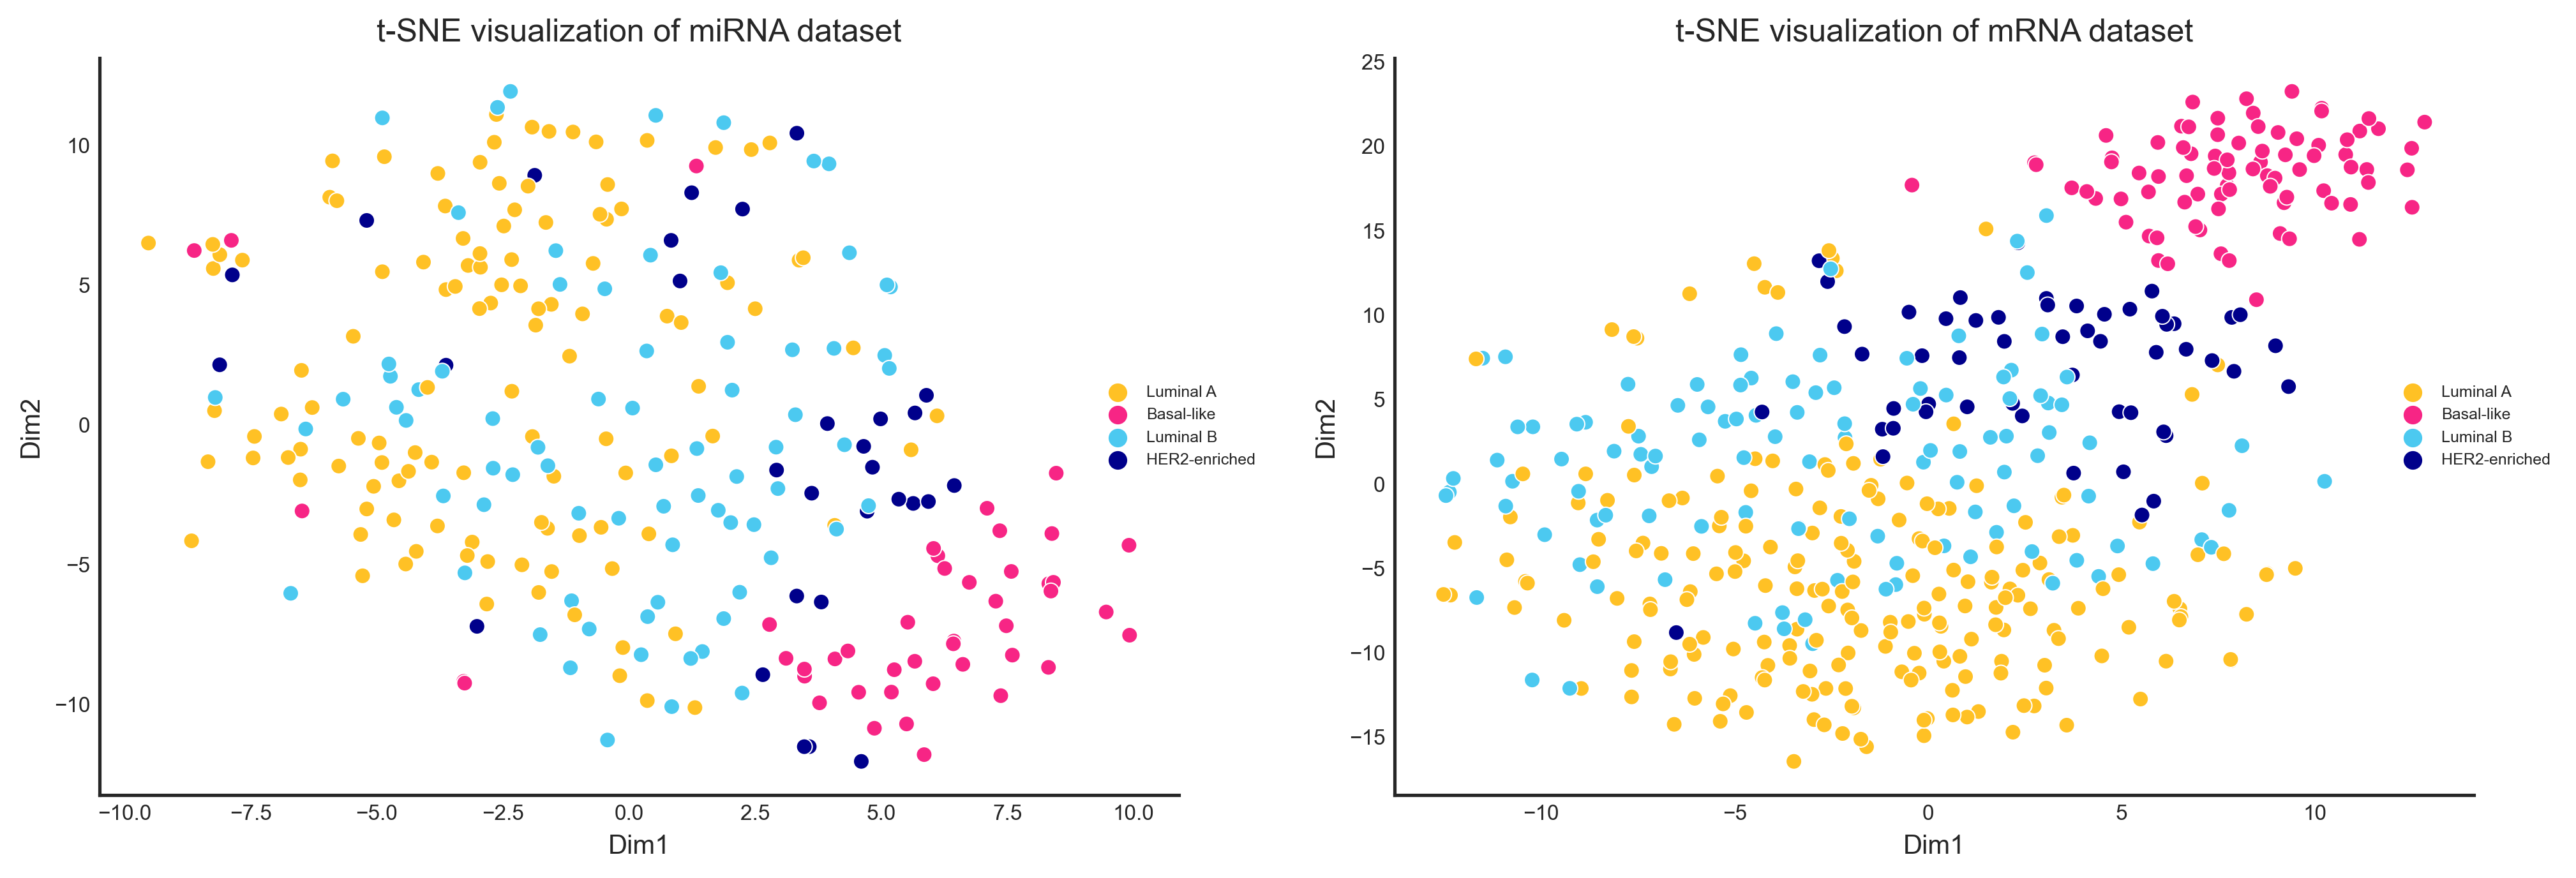

In [ ]:
# Plot the tSNE results
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,5), dpi = 300)
plt.style.use(['seaborn-v0_8-white',])

sns.scatterplot(data = mirna_tsne_df,
                x = 'Dim1', 
                y = 'Dim2', 
                hue = 'PAM50_SUBTYPE', ax = ax[0],
                palette= {'Basal-like': '#F72585', 'HER2-enriched': '#00008B', 'Luminal A': '#FFC125', 'Luminal B': '#4CC9F0'})


ax[0].legend(loc = 'center', bbox_to_anchor = (1, 0.5), fontsize = 6)
ax[0].tick_params(axis='both', labelsize = 8)
ax[0].set_title('t-SNE visualization of miRNA dataset')

sns.scatterplot(data = mrna_tsne_df,
                x = 'Dim1', 
                y = 'Dim2', 
                hue = 'PAM50_SUBTYPE', ax = ax[1],
                palette= {'Basal-like': '#F72585', 'HER2-enriched': '#00008B', 'Luminal A': '#FFC125', 'Luminal B': '#4CC9F0'})

ax[1].legend(loc = 'center', bbox_to_anchor = (1, 0.5), fontsize = 6)
ax[1].tick_params(axis='both', labelsize = 8)
ax[1].set_title('t-SNE visualization of mRNA dataset')

sns.despine()

plt.show()